## Paper: [Towards Photo-Realistic Virtual Try-On by Adaptively Generating, CVPR'20](https://arxiv.org/abs/2003.05863)

![TryOn.jpg](attachment:TryOn.jpg)

#### real_image (original) -----> pose_map -----> cloth_mask -----> color (dress) -----> fake_image (generated)

#### License: The use of this software is RESTRICTED to non-commercial research and educational purposes.

## Dataset: VITON dataset 
    This dataset contains 16,253 image pairs, further splitting into a training set of 14,221 paris and a testing set of 2,032 pairs.

## Repro [Github](https://github.com/switchablenorms/DeepFashion_Try_On)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Project/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Project/'
/content


In [ ]:
!git clone https://github.com/rkuo2000/DeepFashion_Try_On
%cd DeepFashion_Try_On

fatal: destination path 'DeepFashion_Try_On' already exists and is not an empty directory.
/content/drive/MyDrive/Project/DeepFashion_Try_On


## Copy Dataset

In [ ]:
!mkdir Dataset

mkdir: cannot create directory ‘Dataset’: File exists


#### copy VITON dataset (color, edge, mask, colormask)

In [ ]:
# copy VITON dataset
#!cp -r /kaggle/input/viton-dataset/ACGPN_TestData/test_color Dataset
#!cp -r /kaggle/input/viton-dataset/ACGPN_TestData/test_edge Dataset
##!cp -r /kaggle/input/viton-dataset/ACGPN_TestData/test_mask Dataset
#!cp -r /kaggle/input/viton-dataset/ACGPN_TestData/test_colormask Dataset

#### copy TestData (image, pose, label)

In [ ]:
# copy TestData
#!cp -r /kaggle/input/tryontestdata/Dataset/test_img Dataset
#!cp -r /kaggle/input/tryontestdata/Dataset/test_pose Dataset
#!cp -r /kaggle/input/tryontestdata/Dataset/test_label Dataset

#### show number of files in the directory

In [ ]:
import os
print('test image    :', len(os.listdir('./Dataset/test_img')))   # test image (person with clothes)
print('test pose     :', len(os.listdir('./Dataset/test_pose')))  # pose keypoints per test image
print('test label    :', len(os.listdir('./Dataset/test_label'))) # label (dark frame) of test image (for pose-map)
print('test color    :', len(os.listdir('./Dataset/test_color')))     # color clothes  
print('test edge     :', len(os.listdir('./Dataset/test_edge')))      # edge of clothes
print('test mask     :', len(os.listdir('./Dataset/test_mask')))      # test mask        
print('test colormask:', len(os.listdir('./Dataset/test_colormask'))) # test colormask

test image    : 1
test pose     : 1036
test label    : 206
test color    : 200
test edge     : 206
test mask     : 610
test colormask: 501


## Read Pose

### read test_pose .json

In [ ]:
# read pose
import numpy as np
import json
#pose_name = '/kaggle/input/tryon-testdata/Dataset/test_pose/000000_0_keypoints.json'
pose_name = './Dataset/test_pose/000001_0_keypoints.json'
with open(pose_name, 'r') as f:
     pose_label = json.load(f)
     pose_data = pose_label['people'][0]['pose_keypoints']
     pose_data = np.array(pose_data)
     pose_data = pose_data.reshape((-1,3))
print(pose_data)
print(len(pose_data))

[[1.11118110e+02 3.04872727e+01 9.11333680e-01]
 [1.06834646e+02 8.09890909e+01 7.91559875e-01]
 [7.45826772e+01 7.44727273e+01 7.21727289e-01]
 [6.29921260e+01 1.39170909e+02 4.29177985e-01]
 [5.06456693e+01 1.98981818e+02 6.39894508e-01]
 [1.37070866e+02 8.61090909e+01 6.33171842e-01]
 [1.41354331e+02 1.49178182e+02 3.72977426e-01]
 [1.31779528e+02 2.25978182e+02 4.07722341e-01]
 [7.35748031e+01 2.01774545e+02 3.96848263e-01]
 [3.80472441e+01 2.55301818e+02 1.09410599e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12881890e+02 2.04101818e+02 3.39129466e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04566929e+02 2.37381818e+01 9.71781179e-01]
 [1.21700787e+02 2.51345455e+01 9.51698855e-01]
 [9.49921260e+01 3.16509091e+01 8.77784505e-01]
 [1.33543307e+02 3.49090909e+01 9.04681012e-01]]
18


### show pose keypoints on test image

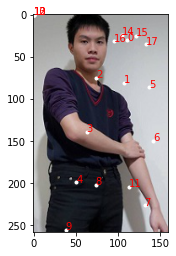

18


In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('./Dataset/test_img/000000_0.jpg')
plt.imshow(img)
i=0
for x,y,z in pose_data: 
    plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
    plt.text(x, y, str(i), color='r', fontsize=10)
    i+=1
plt.show()
print(i)

## Download pre-trained model (checkpoint)

In [ ]:
%cd ACGPN_inference

/content/drive/MyDrive/Project/DeepFashion_Try_On/ACGPN_inference


In [ ]:
!ls

checkpoints	im_pose.jpg  options	  sample	   util
data		models	     __pycache__  test.py
grid_sample.py	one_map.jpg  runs	  tps_grid_gen.py


In [ ]:
# copy the pre-trained model (checkpoint)
#!cp -rf /kaggle/input/acgpn-checkpoints/label2city checkpoints

## Test GAN model 

In [ ]:
pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# clothes fitting, selecting color_name for the clothes
!python test.py --dataroot ../Dataset --color_name 000048_1.jpg

?
------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
color_name: 014379_1.jpg
continue_train: False
data_type: 32
dataroot: ../Data_preprocessing/
debug: False
display_freq: 100
display_winsize: 512
fineSize: 512
gpu_ids: [0]
input_nc: 3
isTrain: True
label_nc: 20
lambda_feat: 10.0
loadSize: 512
load_pretrain: ./checkpoints/label2city
lr: 0.0002
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: label2city
ndf: 64
netG: global
ngf: 64
niter: 100
niter_decay: 100
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_lsgan: False
no_vgg_loss: False
norm: instance
num_D: 2
output_nc: 3
phase: test
pool_size: 0
print_freq: 100
resize_or_crop: scale_width
save_epoch_freq: 10
save_latest_freq: 1000
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomData

#### output : sample/000000_0.jpg

### Display GAN result

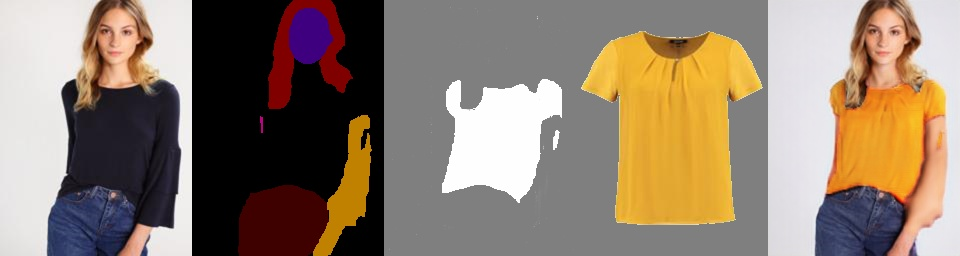

In [ ]:
from IPython.display import Image
Image('./sample/000010_0.jpg')